In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read single-cell sample for VAE analysis
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))
main = main[main['VAE20'] != -1]
main = main[main['VAE9'] != -1]

out = os.path.join(os.getcwd(), 'output/Leiden-VAE_overlap')
if not os.path.exists(out):
    os.makedirs(out)

Leiden_by_VAE20_composition.pdf


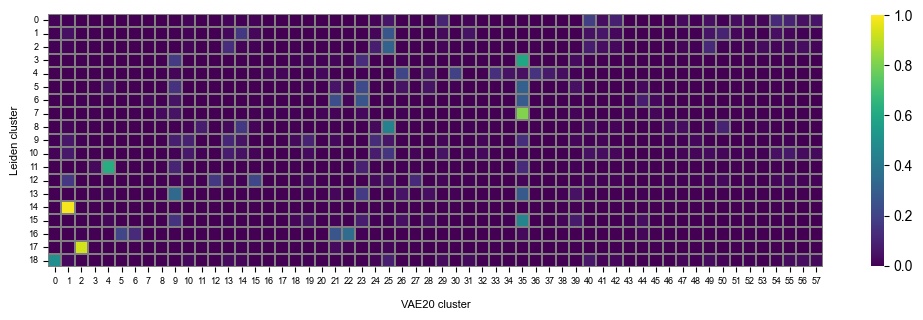

VAE20_by_Leiden_composition.pdf


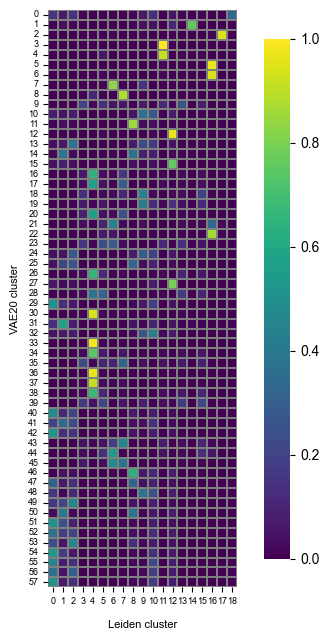

Leiden_by_VAE9_composition.pdf


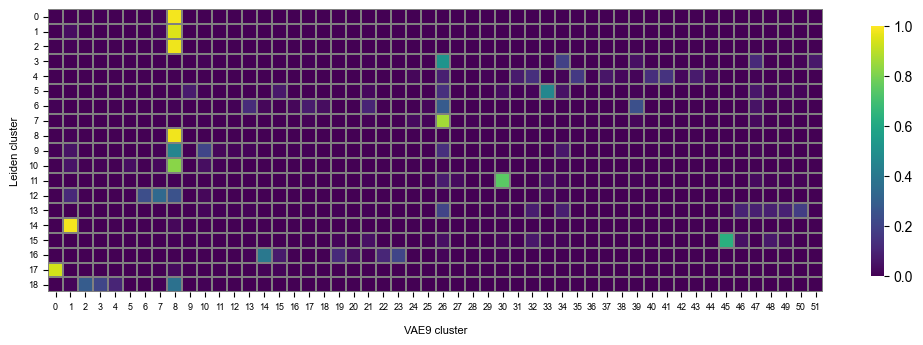

VAE9_by_Leiden_composition.pdf


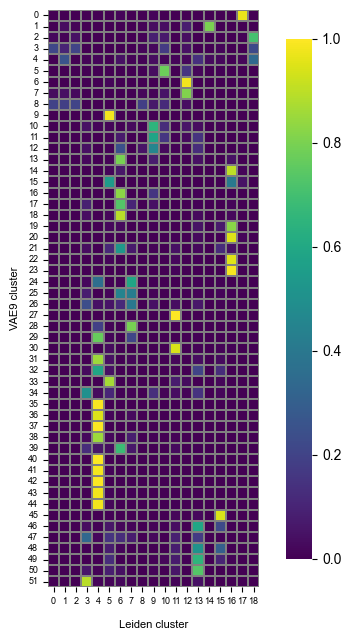

In [3]:
# Plot (heatmap rows sum to 1)
plt.rcParams['font.family'] = 'Arial'
for wsize, column in zip(['20', '9'], ['VAE20', 'VAE9']):

    # VAE composition of Leiden clusters
    df_leiden = pd.DataFrame(index=sorted(main['Leiden'].unique()), columns=sorted(main[column].unique()))

    for leiden in sorted(main['Leiden'].unique()):

        vals = []

        for vae in sorted(main[column].unique()):
            group = main[main['Leiden'] == leiden]
            leiden_cluster_total = len(group)
            num = len(group[group[column] == vae])
            frac = num / leiden_cluster_total
            vals.append(frac)
        
        df_leiden.loc[leiden, :] = vals
    df_leiden = df_leiden.astype('float32')

    fig, ax = plt.subplots(figsize=(12.5, 5))
    g = sns.heatmap(
        df_leiden, xticklabels=1, yticklabels=1, cmap='viridis', square=True, vmin=0, vmax=1,
        linewidths=0.3, linecolor='grey', cbar_kws={'shrink': 0.65}, ax=ax)
    plt.xticks(rotation=0)
    g.set_xlabel(f'VAE{wsize} cluster', fontsize=8, labelpad=10.0)
    g.set_ylabel('Leiden cluster', fontsize=8, labelpad=6.0)
    g.set_xticklabels(g.get_xmajorticklabels(), fontsize=6.5)
    g.set_yticklabels(g.get_ymajorticklabels(), fontsize=6.5)

    fig.savefig(os.path.join(out, f'Leiden_by_VAE{wsize}_composition.pdf'), bbox_inches='tight')
    print(f'Leiden_by_VAE{wsize}_composition.pdf')
    plt.show()
    plt.close('all')


    # Leiden composition of VAE clusters
    df_vae = pd.DataFrame(index=sorted(main[column].unique()), columns=sorted(main['Leiden'].unique()) )

    for vae in sorted(main[column].unique()):

        vals = []

        for leiden in sorted(main['Leiden'].unique()):
            group = main[main[column] == vae]
            vae_cluster_total = len(group)
            num = len(group[group['Leiden'] == leiden])
            frac = num / vae_cluster_total
            vals.append(frac)
        df_vae.loc[vae] = vals
    df_vae = df_vae.astype('float32')

    fig, ax = plt.subplots(figsize=(7, 7.5))
    g = sns.heatmap(
        df_vae, xticklabels=1, yticklabels=1, cmap='viridis', square=True, vmin=0, vmax=1,
        linewidths=0.3, linecolor='grey', cbar_kws={'shrink': 0.9}, ax=ax)
    plt.xticks(rotation=0)
    g.set_xlabel('Leiden cluster', fontsize=8, labelpad=10.0)
    g.set_ylabel(f'VAE{wsize} cluster', fontsize=8, labelpad=6.0)
    g.set_xticklabels(g.get_xmajorticklabels(), fontsize=6.5)
    g.set_yticklabels(g.get_ymajorticklabels(), fontsize=6.5)

    fig.savefig(os.path.join(out, f'VAE{wsize}_by_Leiden_composition.pdf'), bbox_inches='tight')
    print(f'VAE{wsize}_by_Leiden_composition.pdf')
    plt.show()
    plt.close('all')